# Inference for publication!

In [2]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *

In [8]:
dhcp_train_loader, dhcp_test_loader, dhcp_val_loader = get_dataloader('dhcp',100)
hcp_train_loader, hcp_test_loader, hcp_val_loader = get_dataloader('hcp',100)
brats_train_loader, brats_test_loader, brats_val_loader = get_dataloader('brats',100)

model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp.pth')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-last.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-last.pth')
model_unet_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-hcp.pth')
model_unet_brats = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-brats.pth')

model_vae_dhcp.eval()
model_vae_hcp.eval()
model_unet_dhcp.eval()
model_unet_hcp.eval()
model_unet_brats.eval()

[08/16/22 01:37:50] INFO     colossalai - root - INFO: Creating dataset with 80 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 80

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 01:37:53] INFO     colossalai - root - INFO: Creating dataset with 20 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 20

  0%|          | 0/20 [00:00<?, ?it/s]

                    INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 01:37:55] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

                    INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[08/16/22 01:37:57] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

UNet3D(
  (encoders): ModuleList(
    (0): Encoder(
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 1, eps=1e-05, affine=True)
          (conv): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        (SingleConv2): SingleConv(
          (groupnorm): GroupNorm(1, 8, eps=1e-05, affine=True)
          (conv): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
      )
    )
    (1): Encoder(
      (pooling): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (basic_module): DoubleConv(
        (SingleConv1): SingleConv(
          (groupnorm): GroupNorm(1, 16, eps=1e-05, affine=True)
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (ReLU): ReLU(inplace=True)
        )
        

# Inference on dHCP data
Annotations follow model_<traning_set>_<validation_set> format

In [9]:
image_tensor, target_tensor = dhcp_test_loader.__iter__().__next__()
image_tensor, target_tensor = load_image(mode='h5',paths=['/media/hdd/viscent/SR-UNet/dev/hdd/dhcp/dhcp_lores/preprocessed_h5_d5b3/sub-CC00051XX02.h5'])

## UNet-dHCP-dHCP

KL Divergence: None
MSE: tensor(5.7977, device='cuda:0', grad_fn=<MseLossBackward0>)


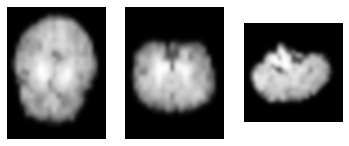

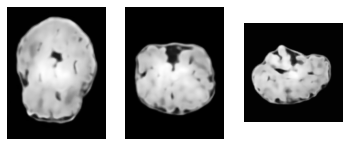

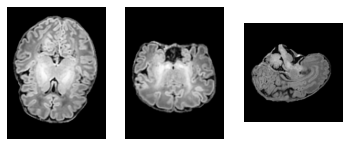

In [10]:
eval(image_tensor,target_tensor,model_unet_dhcp,'unet-dhcp-dhcp')

## UNet-HCP-dHCP

In [ ]:
eval(image_tensor,target_tensor,model_unet_hcp,'unet-hcp-dhcp')

## UNet-BraTS-dHCP

In [ ]:
eval(image_tensor,target_tensor,model_unet_brats,'unet-brats-dhcp')

## VAE-dHCP-dHCP

In [ ]:
eval(image_tensor,target_tensor,model_vae_dhcp,'vae-dhcp-dhcp')

## VAE-HCP-dHCP

In [ ]:
eval(image_tensor,target_tensor,model_vae_hcp,'vae-hcp-dhcp')

# Inference on HCP data

In [ ]:
image_tensor, target_tensor = hcp_test_loader.__iter__().__next__()

## UNet-HCP-HCP

In [ ]:
eval(image_tensor,target_tensor,model_unet_hcp,'unet-hcp-hcp')

## UNet-dHCP-HCP

In [ ]:
eval(image_tensor,target_tensor,model_vae_dhcp,'vae-dhcp-hcp')

## UNet-BraTS-HCP

In [ ]:
eval(image_tensor,target_tensor,model_unet_brats,'vae-brats-hcp')

## VAE-HCP-HCP

In [ ]:
eval(image_tensor,target_tensor,model_vae_hcp,'vae-hcp-hcp')

## VAE-dHCP-HCP

In [ ]:
eval(image_tensor,target_tensor,model_unet_dhcp,'unet-dhcp-hcp')

# Inference on BraTS data

In [8]:
image_tensor, target_tensor = brats_test_loader.__iter__().__next__()

## UNet-BraTS-BraTS

In [ ]:
eval(image_tensor,target_tensor,model_unet_brats,'unet-brats-brats')

## UNet-dHCP-BraTS

KL Divergence: None
MSE: tensor(12598.7646, device='cuda:0', grad_fn=<MseLossBackward0>)


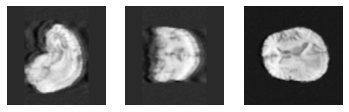

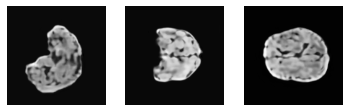

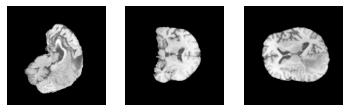

In [9]:
eval(image_tensor,target_tensor,model_unet_dhcp,'unet-dhcp-brats')

## UNet-HCP-BraTS

KL Divergence: None
MSE: tensor(15203.4541, device='cuda:0', grad_fn=<MseLossBackward0>)


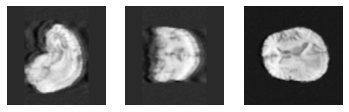

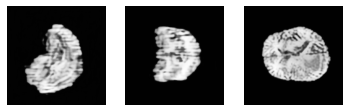

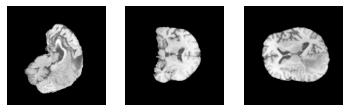

In [10]:
eval(image_tensor,target_tensor,model_unet_hcp,'unet-hcp-brats')

## VAE-HCP-BraTS

KL Divergence: Parameter containing:
tensor(2134670., device='cuda:0')
MSE: Parameter containing:
tensor(14358.4102, device='cuda:0')


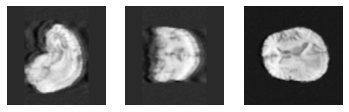

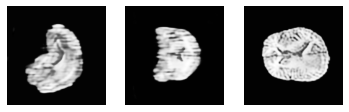

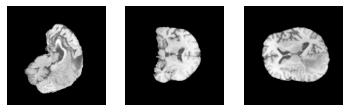

In [11]:
eval(image_tensor,target_tensor,model_vae_hcp,'vae-hcp-brats')

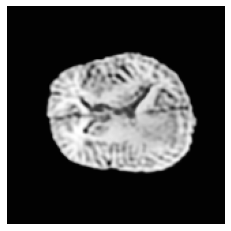

<Figure size 432x288 with 0 Axes>

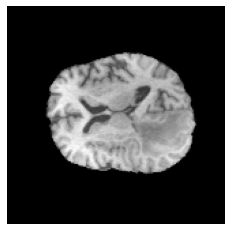

<Figure size 432x288 with 0 Axes>

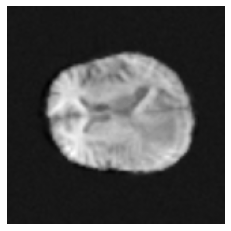

In [26]:
output_tensor = model_vae_hcp(image_tensor.cuda())
image_array = image_tensor.cpu().detach().numpy()[0,0]
output_array = output_tensor.cpu().detach().numpy()[0,0]
target_array = target_tensor.cpu().detach().numpy()[0,0]
fig = plt.figure()
plt.imshow(output_array[...,output_array.shape[2]//2],cmap='gray')
plt.axis('off')
plt.show()
fig.savefig('output-hcp-brats.png', dpi=1200)
plt.clf()
fig = plt.figure()
plt.imshow(target_array[...,target_array.shape[2]//2],cmap='gray')
plt.axis('off')
plt.show()
fig.savefig('target-hcp-brats.png', dpi=1200)
plt.clf()
fig = plt.figure()
plt.imshow(image_array[...,image_array.shape[2]//2],cmap='gray')
plt.axis('off')
plt.show()
fig.savefig('image-hcp-brats.png', dpi=1200)

# Qunatitative evaluation

In [3]:
from scipy.stats import ttest_ind, normaltest, shapiro, mannwhitneyu
from scipy import stats

## Generate priors

In [5]:
kl_dhcp_dhcp = []
kl_dhcp_hcp = []
kl_dhcp_brats = []
kl_hcp_dhcp = []
kl_hcp_hcp = []
kl_hcp_brats = []

mu_dhcp_dhcp = []
mu_dhcp_hcp = []
mu_dhcp_brats = []
mu_hcp_dhcp = []
mu_hcp_hcp = []
mu_hcp_brats = []

logvar_dhcp_dhcp = []
logvar_dhcp_hcp = []
logvar_dhcp_brats = []
logvar_hcp_dhcp = []
logvar_hcp_hcp = []
logvar_hcp_brats = []

mse_dhcp_dhcp = []
mse_dhcp_hcp = []
mse_dhcp_brats = []
mse_hcp_dhcp = []
mse_hcp_hcp = []
mse_hcp_brats = []

model_vae_dhcp.train()
model_vae_hcp.train()

for im, gt in tqdm(dhcp_val_loader):
    im = im.cuda()
    gt = gt.cuda()
    output_dhcp = model_vae_dhcp(im)
    output_hcp = model_vae_hcp(im)
    kl_dhcp_dhcp.append(kl_forward(model_vae_dhcp,output_dhcp).cpu().detach())
    kl_hcp_dhcp.append(kl_forward(model_vae_hcp,output_hcp).cpu().detach())
    mse_dhcp_dhcp.append(torch.nn.MSELoss()(output_dhcp,gt).cpu().detach())
    mse_hcp_dhcp.append(torch.nn.MSELoss()(output_hcp,gt).cpu().detach())
    mu_dhcp_dhcp.append(model_vae_dhcp.enc_mu.cpu().detach())
    mu_hcp_dhcp.append(model_vae_hcp.enc_mu.cpu().detach())
    logvar_dhcp_dhcp.append(model_vae_dhcp.enc_logvar.cpu().detach())
    logvar_hcp_dhcp.append(model_vae_hcp.enc_logvar.cpu().detach())
for im, gt in tqdm(hcp_val_loader):
    im = im.cuda()
    gt = gt.cuda()
    output_dhcp = model_vae_dhcp(im)
    output_hcp = model_vae_hcp(im)
    model_vae_dhcp.VAE_loss(output_dhcp,gt)
    model_vae_hcp.VAE_loss(output_hcp,gt)
    kl_dhcp_hcp.append(kl_forward(model_vae_dhcp,output_dhcp).cpu().detach())
    kl_hcp_hcp.append(kl_forward(model_vae_hcp,output_hcp).cpu().detach())
    mse_dhcp_hcp.append(torch.nn.MSELoss()(output_dhcp,gt).cpu().detach())
    mse_hcp_hcp.append(torch.nn.MSELoss()(output_hcp,gt).cpu().detach())
    mu_dhcp_hcp.append(model_vae_dhcp.enc_mu.cpu().detach())
    mu_hcp_hcp.append(model_vae_hcp.enc_mu.cpu().detach())
    logvar_dhcp_hcp.append(model_vae_dhcp.enc_logvar.cpu().detach())
    logvar_hcp_hcp.append(model_vae_hcp.enc_logvar.cpu().detach())
for im, gt in tqdm(brats_val_loader):
    im = im.cuda()
    gt = gt.cuda()
    output_dhcp = model_vae_dhcp(im)
    output_hcp = model_vae_hcp(im)
    model_vae_dhcp.VAE_loss(output_dhcp,gt)
    model_vae_hcp.VAE_loss(output_hcp,gt)
    kl_dhcp_brats.append(kl_forward(model_vae_dhcp,output_dhcp).cpu().detach())
    kl_hcp_brats.append(kl_forward(model_vae_hcp,output_hcp).cpu().detach())
    mse_dhcp_brats.append(torch.nn.MSELoss()(output_dhcp,gt).cpu().detach())
    mse_hcp_brats.append(torch.nn.MSELoss()(output_hcp,gt).cpu().detach())
    mu_dhcp_brats.append(model_vae_dhcp.enc_mu.cpu().detach())
    mu_hcp_brats.append(model_vae_hcp.enc_mu.cpu().detach())
    logvar_dhcp_brats.append(model_vae_dhcp.enc_logvar.cpu().detach())
    logvar_hcp_brats.append(model_vae_hcp.enc_logvar.cpu().detach())

kl_dhcp_dhcp = torch.stack(kl_dhcp_dhcp).cpu().numpy()
kl_dhcp_hcp = torch.stack(kl_dhcp_hcp).cpu().numpy()
kl_dhcp_brats = torch.stack(kl_dhcp_brats).cpu().numpy()
kl_hcp_dhcp = torch.stack(kl_hcp_dhcp).cpu().numpy()
kl_hcp_hcp = torch.stack(kl_hcp_hcp).cpu().numpy()
kl_hcp_brats = torch.stack(kl_hcp_brats).cpu().numpy()

mse_dhcp_dhcp = torch.stack(mse_dhcp_dhcp).cpu().numpy()
mse_dhcp_hcp = torch.stack(mse_dhcp_hcp).cpu().numpy()
mse_dhcp_brats = torch.stack(mse_dhcp_brats).cpu().numpy()
mse_hcp_dhcp = torch.stack(mse_hcp_dhcp).cpu().numpy()
mse_hcp_hcp = torch.stack(mse_hcp_hcp).cpu().numpy()
mse_hcp_brats = torch.stack(mse_hcp_brats).cpu().numpy()

# mu_dhcp_dhcp = torch.stack(mu_dhcp_dhcp).cpu().numpy().mean(axis=1)
# mu_dhcp_hcp = torch.stack(mu_dhcp_hcp).cpu().numpy().mean(axis=1)
# mu_dhcp_brats = torch.stack(mu_dhcp_brats).cpu().numpy().mean(axis=1)
# mu_hcp_dhcp = torch.stack(mu_hcp_dhcp).cpu().numpy().mean(axis=1)
# mu_hcp_hcp = torch.stack(mu_hcp_hcp).cpu().numpy().mean(axis=1)
# mu_hcp_brats = torch.stack(mu_hcp_brats).cpu().numpy().mean(axis=1)

# logvar_dhcp_dhcp = torch.stack(logvar_dhcp_dhcp).cpu().numpy().mean(axis=1)
# logvar_dhcp_hcp = torch.stack(logvar_dhcp_hcp).cpu().numpy().mean(axis=1)
# logvar_dhcp_brats = torch.stack(logvar_dhcp_brats).cpu().numpy().mean(axis=1)
# logvar_hcp_dhcp = torch.stack(logvar_hcp_dhcp).cpu().numpy().mean(axis=1)
# logvar_hcp_hcp = torch.stack(logvar_hcp_hcp).cpu().numpy().mean(axis=1)
# logvar_hcp_brats = torch.stack(logvar_hcp_brats).cpu().numpy().mean(axis=1)


mu_dhcp_dhcp = torch.stack(mu_dhcp_dhcp)
mu_dhcp_hcp = torch.stack(mu_dhcp_hcp)
mu_dhcp_brats = torch.stack(mu_dhcp_brats)
mu_hcp_dhcp = torch.stack(mu_hcp_dhcp)
mu_hcp_hcp = torch.stack(mu_hcp_hcp)
mu_hcp_brats = torch.stack(mu_hcp_brats)

logvar_dhcp_dhcp = torch.stack(logvar_dhcp_dhcp)
logvar_dhcp_hcp = torch.stack(logvar_dhcp_hcp)
logvar_dhcp_brats = torch.stack(logvar_dhcp_brats)
logvar_hcp_dhcp = torch.stack(logvar_hcp_dhcp)
logvar_hcp_hcp = torch.stack(logvar_hcp_hcp)
logvar_hcp_brats = torch.stack(logvar_hcp_brats)

kl_dhcp_dhcp = kl_dhcp_dhcp[~is_outlier(kl_dhcp_dhcp)]
kl_dhcp_hcp = kl_dhcp_hcp[~is_outlier(kl_dhcp_hcp)]
kl_dhcp_brats = kl_dhcp_brats[~is_outlier(kl_dhcp_brats)]
kl_hcp_dhcp = kl_hcp_dhcp[~is_outlier(kl_hcp_dhcp)]
kl_hcp_hcp = kl_hcp_hcp[~is_outlier(kl_hcp_hcp)]
kl_hcp_brats = kl_hcp_brats[~is_outlier(kl_hcp_brats)]

mse_dhcp_dhcp = mse_dhcp_dhcp[~is_outlier(mse_dhcp_dhcp)]
mse_dhcp_hcp = mse_dhcp_hcp[~is_outlier(mse_dhcp_hcp)]
mse_dhcp_brats = mse_dhcp_brats[~is_outlier(mse_dhcp_brats)]
mse_hcp_dhcp = mse_hcp_dhcp[~is_outlier(mse_hcp_dhcp)]
mse_hcp_hcp = mse_hcp_hcp[~is_outlier(mse_hcp_hcp)]
mse_hcp_brats = mse_hcp_brats[~is_outlier(mse_hcp_brats)]

100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


In [7]:
torch.save(mu_dhcp_dhcp, '/media/hdd/viscent/SR-UNet/results/mu_dhcp_dhcp.pt')
torch.save(mu_dhcp_hcp, '/media/hdd/viscent/SR-UNet/results/mu_dhcp_hcp.pt')
torch.save(mu_dhcp_brats, '/media/hdd/viscent/SR-UNet/results/mu_dhcp_brats.pt')
torch.save(mu_hcp_dhcp, '/media/hdd/viscent/SR-UNet/results/mu_hcp_dhcp.pt')
torch.save(mu_hcp_hcp, '/media/hdd/viscent/SR-UNet/results/mu_hcp_hcp.pt')
torch.save(mu_hcp_brats, '/media/hdd/viscent/SR-UNet/results/mu_hcp_brats.pt')

torch.save(logvar_dhcp_dhcp, '/media/hdd/viscent/SR-UNet/results/logvar_dhcp_dhcp.pt')
torch.save(logvar_dhcp_hcp, '/media/hdd/viscent/SR-UNet/results/logvar_dhcp_hcp.pt')
torch.save(logvar_dhcp_brats, '/media/hdd/viscent/SR-UNet/results/logvar_dhcp_brats.pt')
torch.save(logvar_hcp_dhcp, '/media/hdd/viscent/SR-UNet/results/logvar_hcp_dhcp.pt')
torch.save(logvar_hcp_hcp, '/media/hdd/viscent/SR-UNet/results/logvar_hcp_hcp.pt')
torch.save(logvar_hcp_brats, '/media/hdd/viscent/SR-UNet/results/logvar_hcp_brats.pt')


In [ ]:
print('DHCP-DHCP mean:', mu_dhcp_dhcp.mean())
print('DHCP-HCP mean:', mu_dhcp_hcp.mean())
print('DHCP-DHCP std:', mu_dhcp_dhcp.std())
print('DHCP-HCP std:', mu_dhcp_hcp.std())

In [ ]:
print('DHCP-DHCP mean:', logvar_dhcp_dhcp.mean())
print('DHCP-HCP mean:', logvar_dhcp_hcp.mean())
print('DHCP-DHCP std:', logvar_dhcp_dhcp.std())
print('DHCP-HCP std:', logvar_dhcp_hcp.std())

In [5]:
import numpy as np
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_dhcp.csv',kl_dhcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_hcp.csv',kl_dhcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_brats.csv',kl_dhcp_brats,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_dhcp.csv',kl_hcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_hcp.csv',kl_hcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_brats.csv',kl_hcp_brats,delimiter=',')

np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_dhcp.csv',mse_dhcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_hcp.csv',mse_dhcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_brats.csv',mse_dhcp_brats,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_dhcp.csv',mse_hcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_hcp.csv',mse_hcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_brats.csv',mse_hcp_brats,delimiter=',')

np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_dhcp.csv',mu_dhcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_hcp.csv',mu_dhcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_brats.csv',mu_dhcp_brats,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_dhcp.csv',mu_hcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_hcp.csv',mu_hcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_brats.csv',mu_hcp_brats,delimiter=',')

np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_dhcp.csv',logvar_dhcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_hcp.csv',logvar_dhcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_brats.csv',logvar_dhcp_brats,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_dhcp.csv',logvar_hcp_dhcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_hcp.csv',logvar_hcp_hcp,delimiter=',')
np.savetxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_brats.csv',logvar_hcp_brats,delimiter=',')


## Load priori

In [7]:
kl_dhcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_dhcp.csv',delimiter=',')
kl_dhcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_hcp.csv',delimiter=',')
kl_dhcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_dhcp_brats.csv',delimiter=',')
kl_hcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_dhcp.csv',delimiter=',')
kl_hcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_hcp.csv',delimiter=',')
kl_hcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/kl_hcp_brats.csv',delimiter=',')

mse_dhcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_dhcp.csv',delimiter=',')
mse_dhcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_hcp.csv',delimiter=',')
mse_dhcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_dhcp_brats.csv',delimiter=',')
mse_hcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_dhcp.csv',delimiter=',')
mse_hcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_hcp.csv',delimiter=',')
mse_hcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mse_hcp_brats.csv',delimiter=',')

# mu_dhcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_dhcp.csv',delimiter=',')
# mu_dhcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_hcp.csv',delimiter=',')
# mu_dhcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_dhcp_brats.csv',delimiter=',')
# mu_hcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_dhcp.csv',delimiter=',')
# mu_hcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_hcp.csv',delimiter=',')
# mu_hcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/mu_hcp_brats.csv',delimiter=',')

mu_dhcp_dhcp = torch.load('/media/hdd/viscent/SR-UNet/results/mu_dhcp_dhcp.pt')
mu_dhcp_hcp = torch.load('/media/hdd/viscent/SR-UNet/results/mu_dhcp_hcp.pt')
mu_dhcp_brats = torch.load('/media/hdd/viscent/SR-UNet/results/mu_dhcp_brats.pt')
mu_hcp_dhcp = torch.load('/media/hdd/viscent/SR-UNet/results/mu_hcp_dhcp.pt')
mu_hcp_hcp = torch.load('/media/hdd/viscent/SR-UNet/results/mu_hcp_hcp.pt')
mu_hcp_brats = torch.load('/media/hdd/viscent/SR-UNet/results/mu_hcp_brats.pt')

logvar_dhcp_dhcp = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_dhcp.pt')
logvar_dhcp_hcp = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_hcp.pt')
logvar_dhcp_brats = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_brats.pt')
logvar_hcp_dhcp = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_hcp_dhcp.pt')
logvar_hcp_hcp = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_hcp_hcp.pt')
logvar_hcp_brats = torch.load('/media/hdd/viscent/SR-UNet/results/logvar_hcp_brats.pt')


# logvar_dhcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_dhcp.csv',delimiter=',')
# logvar_dhcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_hcp.csv',delimiter=',')
# logvar_dhcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_dhcp_brats.csv',delimiter=',')
# logvar_hcp_dhcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_dhcp.csv',delimiter=',')
# logvar_hcp_hcp = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_hcp.csv',delimiter=',')
# logvar_hcp_brats = np.loadtxt('/media/hdd/viscent/SR-UNet/results/logvar_hcp_brats.csv',delimiter=',')

## Statistical test of evaluation metrics

dhcp-dhcp: NormaltestResult(statistic=4.022662881558482, pvalue=0.13381039539387968)
dhcp-hcp: NormaltestResult(statistic=1.3743465591557595, pvalue=0.5029958901569629)
dhcp-brats: NormaltestResult(statistic=2.693616651349248, pvalue=0.260068992948195)
Data is normal, using t-test
t_hcp_brats:  Ttest_indResult(statistic=-3.56303703798375, pvalue=0.0010552262698753237)
t_dhcp_brats:  Ttest_indResult(statistic=4.462972894198654, pvalue=8.43764884040601e-05)
t_hcp_dhcp:  Ttest_indResult(statistic=2.184647271515786, pvalue=0.035904899058104525)


/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17

/home/viscent/anaconda3/envs/bunet/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



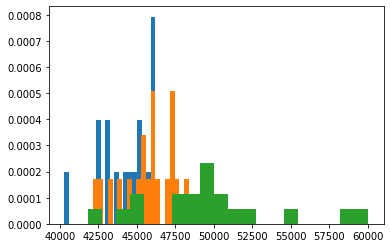

In [8]:
fig_dhcp = plt.figure()
_, x_dhcp_dhcp, _ = plt.hist(kl_dhcp_dhcp, bins=20, density=True, label='dhcp-dhcp')
_, x_dhcp_hcp, _ = plt.hist(kl_dhcp_hcp, bins=20, density=True, label='dhcp-hcp')
_, x_dhcp_brats, _ = plt.hist(kl_dhcp_brats, bins=20, density=True, label='dhcp-brats')
normal_dhcp_dhcp = normaltest(kl_dhcp_dhcp)
normal_dhcp_hcp = normaltest(kl_dhcp_hcp)
normal_dhcp_brats = normaltest(kl_dhcp_brats)
print('dhcp-dhcp:', normal_dhcp_dhcp)
print('dhcp-hcp:', normal_dhcp_hcp)
print('dhcp-brats:', normal_dhcp_brats)
if normal_dhcp_dhcp[1] < 0.05 or normal_dhcp_hcp[1] < 0.05 or normal_dhcp_brats[1] < 0.05:
    print('Data is not normal, using Mann-Whitney U test')
    u_hcp_brats = mannwhitneyu(kl_dhcp_hcp, kl_dhcp_brats)
    u_dhcp_brats = mannwhitneyu(kl_dhcp_brats, kl_dhcp_dhcp)
    u_hcp_dhcp = mannwhitneyu(kl_dhcp_hcp, kl_dhcp_dhcp)
    print('U_hcp_brats: ', u_hcp_brats)
    print('U_dhcp_brats: ', u_dhcp_brats)
    print('U_hcp_dhcp: ', u_hcp_dhcp)
else:
    print('Data is normal, using t-test')
    t_hcp_brats = ttest_ind(kl_dhcp_hcp, kl_dhcp_brats)
    t_dhcp_brats = ttest_ind(kl_dhcp_brats, kl_dhcp_dhcp)
    t_hcp_dhcp = ttest_ind(kl_dhcp_hcp, kl_dhcp_dhcp)
    print('t_hcp_brats: ', t_hcp_brats)
    print('t_dhcp_brats: ', t_dhcp_brats)
    print('t_hcp_dhcp: ', t_hcp_dhcp)


hcp-dhcp: NormaltestResult(statistic=0.49363361136220074, pvalue=0.7812838071770958)
hcp-hcp: NormaltestResult(statistic=1.8839985113891373, pvalue=0.38984765058851384)
hcp-brats: NormaltestResult(statistic=0.17695345885624833, pvalue=0.9153244106106533)
Data is normal, using t-test
t_hcp_brats:  Ttest_indResult(statistic=-1.4246023091068083, pvalue=0.16243359422772036)
t_hcp_dhcp:  Ttest_indResult(statistic=1.0244409913832428, pvalue=0.3121046027766456)
t_dhcp_brats:  Ttest_indResult(statistic=0.22362905202963512, pvalue=0.8242438801712966)


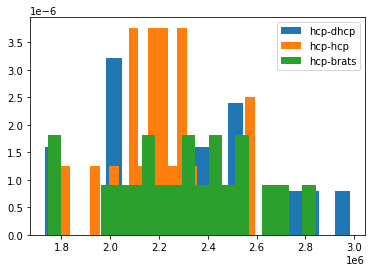

In [9]:
fig_hcp = plt.figure()
plt.hist(kl_hcp_dhcp, bins=20, density=True, label='hcp-dhcp')
plt.hist(kl_hcp_hcp, bins=20, density=True, label='hcp-hcp')
plt.hist(kl_hcp_brats, bins=20, density=True, label='hcp-brats')
plt.legend()
normal_hcp_dhcp = normaltest(kl_hcp_dhcp)
normal_hcp_hcp = normaltest(kl_hcp_hcp)
normal_hcp_brats = normaltest(kl_hcp_brats)
print('hcp-dhcp:', normal_hcp_dhcp)
print('hcp-hcp:', normal_hcp_hcp)
print('hcp-brats:', normal_hcp_brats)
if normal_hcp_dhcp[1] < 0.05 or normal_hcp_hcp[1] < 0.05 or normal_hcp_brats[1] < 0.05:
    print('Data is not normal, using Mann-Whitney U test')
    u_hcp_brats = mannwhitneyu(kl_hcp_hcp, kl_hcp_brats)
    u_hcp_dhcp = mannwhitneyu(kl_hcp_dhcp, kl_hcp_hcp)
    u_dhcp_brats = mannwhitneyu(kl_hcp_brats, kl_hcp_dhcp)
    print('U_hcp_brats: ', u_hcp_brats)
    print('U_hcp_dhcp: ', u_hcp_dhcp)
    print('U_dhcp_brats: ', u_dhcp_brats)
else:
    print('Data is normal, using t-test')
    t_hcp_brats = ttest_ind(kl_hcp_hcp, kl_hcp_brats)
    t_hcp_dhcp = ttest_ind(kl_hcp_dhcp, kl_hcp_hcp)
    t_dhcp_brats = ttest_ind(kl_hcp_brats, kl_hcp_dhcp)
    print('t_hcp_brats: ', t_hcp_brats)
    print('t_hcp_dhcp: ', t_hcp_dhcp)
    print('t_dhcp_brats: ', t_dhcp_brats)

dhcp-dhcp: NormaltestResult(statistic=0.5793461806139368, pvalue=0.7485082221795505)
dhcp-hcp: NormaltestResult(statistic=1.0059427668024312, pvalue=0.6047310994937609)
dhcp-brats: NormaltestResult(statistic=1.0461235697376434, pvalue=0.5927030377846662)
Data is normal, using t-test
t_hcp_brats:  Ttest_indResult(statistic=16.31340347907986, pvalue=9.429248346785044e-19)
t_hcp_dhcp:  Ttest_indResult(statistic=21.304117038826018, pvalue=9.921000983520924e-23)
t_dhcp_brats:  Ttest_indResult(statistic=17.355148331014437, pvalue=1.1771471512183085e-19)


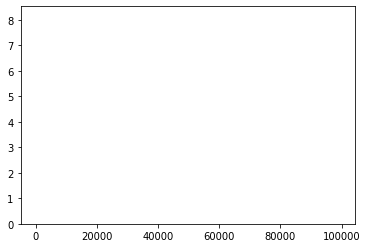

In [11]:
fig_dhcp = plt.figure()
_, x_dhcp_dhcp, _ = plt.hist(mse_dhcp_dhcp, bins=20, density=True, label='dhcp-dhcp')
_, x_dhcp_hcp, _ = plt.hist(mse_dhcp_hcp, bins=20, density=True, label='dhcp-hcp')
_, x_dhcp_brats, _ = plt.hist(mse_dhcp_brats, bins=20, density=True, label='dhcp-brats')
normal_dhcp_dhcp = normaltest(mse_dhcp_dhcp)
normal_dhcp_hcp = normaltest(mse_dhcp_hcp)
normal_dhcp_brats = normaltest(mse_dhcp_brats)
print('dhcp-dhcp:', normal_dhcp_dhcp)
print('dhcp-hcp:', normal_dhcp_hcp)
print('dhcp-brats:', normal_dhcp_brats)
if normal_dhcp_dhcp[1] < 0.05 or normal_dhcp_hcp[1] < 0.05 or normal_dhcp_brats[1] < 0.05:
    print('Data is not normal, using Mann-Whitney U test')
    u_hcp_brats = mannwhitneyu(mse_dhcp_hcp, mse_dhcp_brats)
    u_dhcp_brats = mannwhitneyu(mse_dhcp_brats, mse_dhcp_dhcp)
    u_hcp_dhcp = mannwhitneyu(mse_dhcp_hcp, mse_dhcp_dhcp)
    print('U_hcp_brats: ', u_hcp_brats)
    print('U_hcp_dhcp: ', u_hcp_dhcp)
    print('U_dhcp_brats: ', u_dhcp_brats)
else:
    print('Data is normal, using t-test')
    t_hcp_brats = ttest_ind(mse_dhcp_hcp, mse_dhcp_brats)
    t_dhcp_brats = ttest_ind(mse_dhcp_brats, mse_dhcp_dhcp)
    t_hcp_dhcp = ttest_ind(mse_dhcp_hcp, mse_dhcp_dhcp)
    print('t_hcp_brats: ', t_hcp_brats)
    print('t_hcp_dhcp: ', t_hcp_dhcp)
    print('t_dhcp_brats: ', t_dhcp_brats)

## model selector

In [8]:
mu_dhcp_mean = mu_dhcp_dhcp.mean(axis=0).flatten().cuda()
mu_hcp_mean = mu_hcp_hcp.mean(axis=0).flatten().cuda()
logvar_dhcp_mean = logvar_dhcp_dhcp.mean(axis=0).flatten().cuda()
logvar_hcp_mean = logvar_hcp_hcp.mean(axis=0).flatten().cuda()

In [9]:
def kl_forward_prior(self, x, mu_q, logvar_q):
    with torch.no_grad():
        # encoder part
        encoders_features = []
        for encoder in self.encoders:
            x = encoder(x)
            # reverse the encoder outputs to be aligned with the decoder
            encoders_features.insert(0, x)
        # VAE part
        # x = x.view(x.size(0),-1,self.latent_size)
        encoders_features = encoders_features[1:]
        x = torch.transpose(x, 1, 4)

        mu = self.mu(x).flatten()
        logvar = self.logvar(x).flatten()
        mu_p = mu
        logvar_p = logvar

        cov_p = torch.exp(logvar_p)
        cov_p[cov_p.isnan()] = cov_p.mean()
        cov_p[cov_p == 0] = cov_p.mean()
        cov_p = cov_p.diag()
        cov_q = torch.exp(logvar_q)
        cov_q[cov_q.isnan()] = cov_q.mean()
        cov_q[cov_q == 0] = cov_q.mean()
        cov_q = cov_q.diag()
        k = mu_p.shape[0]

        # tmp = ((mu_p-mu_q)**2 / torch.exp(logvar_q))
        # tmp[tmp.isnan()] = tmp.median()
        # tmp[tmp.isinf()] = tmp.median()
        # tmp = tmp.sum()
        logvar_q = logvar_q.double()
        logvar_p = logvar_p.double()
        mu_q = mu_q.double()
        mu_p = mu_p.double()
        # kl = 0.5 *( logvar_q.sum() - logvar_p.sum() - k + tmp + (torch.exp(logvar_p-logvar_q).sum()))
        tmp = (logvar_q - logvar_p + torch.exp(2*(logvar_p - logvar_q))/2 - 0.5)
        # tmp[tmp.isnan()] = tmp.median()
        # tmp[tmp.isinf()] = tmp.median()
        # tmp = torch.sigmoid(tmp)
        tmp = (tmp-tmp.mean())/tmp.std()
        kl = tmp.mean()
        # kl = torch.nn.functional.softmax(kl, dim=0)
        # print(kl)
        return kl

In [10]:
image_tensor, target_tensor = dhcp_train_loader.__iter__().__next__()
image_tensor = image_tensor.cuda()
target_tensor = target_tensor.cuda()
output_tensor_dhcp = model_vae_dhcp(image_tensor)
output_tensor_hcp = model_vae_hcp(image_tensor)
plt.Figure()
kl_p_dhcp = kl_forward_prior(model_vae_dhcp, image_tensor, mu_dhcp_mean, logvar_dhcp_mean)
plt.Figure()
kl_p_hcp = kl_forward_prior(model_vae_hcp, image_tensor, mu_hcp_mean, logvar_hcp_mean)
# per_kl_p_dhcp = (kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())
# per_kl_p_hcp = (kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())
print('per_kl_p_dhcp:', kl_p_dhcp)
print('per_kl_p_hcp:', kl_p_hcp)
mse_dhcp = torch.nn.MSELoss()(output_tensor_dhcp, target_tensor)
mse_hcp = torch.nn.MSELoss()(output_tensor_hcp, target_tensor)
print('mse_dhcp:', mse_dhcp)
print('mse_hcp:', mse_hcp)

per_kl_p_dhcp: tensor(-3.5527e-18, device='cuda:0', dtype=torch.float64)
per_kl_p_hcp: tensor(0., device='cuda:0', dtype=torch.float64)
mse_dhcp: tensor(0.4219, device='cuda:0', grad_fn=<MseLossBackward0>)
mse_hcp: tensor(64378.2344, device='cuda:0', grad_fn=<MseLossBackward0>)


In [11]:
image_tensor, target_tensor = hcp_train_loader.__iter__().__next__()
image_tensor = image_tensor.cuda()
target_tensor = target_tensor.cuda()
output_tensor_dhcp = model_vae_dhcp(image_tensor)
output_tensor_hcp = model_vae_hcp(image_tensor)
kl_p_dhcp = kl_forward_prior(model_vae_dhcp, image_tensor, mu_dhcp_mean, logvar_dhcp_mean)
kl_p_hcp = kl_forward_prior(model_vae_hcp, image_tensor, mu_hcp_mean, logvar_hcp_mean)
# per_kl_p_dhcp = (kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())
# per_kl_p_hcp = (kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())
print('per_kl_p_dhcp:', kl_p_dhcp)
print('per_kl_p_hcp:', kl_p_hcp)
mse_dhcp = torch.nn.MSELoss()(output_tensor_dhcp, target_tensor)
mse_hcp = torch.nn.MSELoss()(output_tensor_hcp, target_tensor)
print('mse_dhcp:', mse_dhcp)
print('mse_hcp:', mse_hcp)

per_kl_p_dhcp: tensor(-1.0658e-17, device='cuda:0', dtype=torch.float64)
per_kl_p_hcp: tensor(0., device='cuda:0', dtype=torch.float64)
mse_dhcp: tensor(47361.5000, device='cuda:0', grad_fn=<MseLossBackward0>)
mse_hcp: tensor(3160.3396, device='cuda:0', grad_fn=<MseLossBackward0>)


### dHCP, HCP, BraTS

In [12]:
val_imgs = []
val_gts = []
mse_optim = []
mse_dhcp = []
mse_hcp = []
num_success = 0
counter = 0
for im,gt in brats_val_loader:
    if counter == 20:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1
counter = 0
for im,gt in hcp_val_loader:
    if counter == 20:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1
counter = 0
for im,gt in brats_val_loader:
    if counter == 20:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1

ids = np.arange(len(val_imgs))
np.random.shuffle(ids)
for idx in tqdm(ids):
    im = val_imgs[idx].cuda()
    gt = val_gts[idx].cuda()
    # im = im.cuda()
    # gt = gt.cuda()
    kl_p_dhcp = kl_forward_prior(model_vae_dhcp, im, mu_dhcp_mean, logvar_dhcp_mean).detach().cpu().numpy()
    kl_p_hcp = kl_forward_prior(model_vae_hcp, im, mu_hcp_mean, logvar_hcp_mean).detach().cpu().numpy()
    # per_kl_p_dhcp = ((kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())).abs()
    # per_kl_p_hcp = ((kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())).abs()
    # print('per_kl_p_dhcp:', per_kl_p_dhcp)
    # print('per_kl_p_hcp:', per_kl_p_hcp)
    if kl_p_dhcp < kl_p_hcp:
        output_tensor = model_vae_dhcp(im)
    else:
        output_tensor = model_vae_hcp(im)
    mse_optim.append(torch.nn.MSELoss()(output_tensor, gt).cpu().detach().numpy())
    output_tensor_dhcp = model_vae_dhcp(im)
    output_tensor_hcp = model_vae_hcp(im)
    mse_dhcp.append(torch.nn.MSELoss()(output_tensor_dhcp, gt).cpu().detach().numpy())
    mse_hcp.append(torch.nn.MSELoss()(output_tensor_hcp, gt).cpu().detach().numpy())
    if mse_optim[-1] < max(mse_dhcp[-1], mse_hcp[-1]):
        num_success += 1
    print('kl_p_dhcp:', kl_p_dhcp, 'kl_p_hcp:', kl_p_hcp,'\n','mse_hcp:', mse_hcp[-1], 'mse_dhcp:', mse_dhcp[-1], 'mse_optim:', mse_optim[-1])

  0%|          | 0/60 [00:00<?, ?it/s]

kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: -1.7763568394002505e-18 
 mse_hcp: 1380.9385 mse_dhcp: 59255.348 mse_optim: 1380.9397
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 9420.713 mse_dhcp: 15764.433 mse_optim: 12288.633
kl_p_dhcp: -7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 19699.926 mse_dhcp: 14021.375 mse_optim: 14021.406
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: -1.509903313490213e-17 
 mse_hcp: 23618.72 mse_dhcp: 14788.156 mse_optim: 23625.982
kl_p_dhcp: 0.0 kl_p_hcp: 0.0 
 mse_hcp: 16634.191 mse_dhcp: 10845.152 mse_optim: 16612.057
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 11946.769 mse_dhcp: 15764.447 mse_optim: 11858.177
kl_p_dhcp: 3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 13769.005 mse_dhcp: 10555.484 mse_optim: 13768.987
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: -8.881784197001253e-18 
 mse_hcp: 16851.207 mse_dhcp: 12607.705 mse_optim: 16851.156
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 1359.0999 mse_dhcp: 66045.74 

In [13]:
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_optim[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_bms:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_dhcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_dhcp:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_hcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_hcp:', num_success)

num_success_bms: 48
num_success_dhcp: 26
num_success_hcp: 34


### dHCP, HCP

In [28]:
val_imgs = []
val_gts = []
mse_optim = []
mse_dhcp = []
mse_hcp = []
num_success = 0
counter = 0
for im,gt in dhcp_train_loader:
    if counter == 30:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1
counter = 0
for im,gt in hcp_train_loader:
    if counter == 30:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1
counter = 0

ids = np.arange(len(val_imgs))
np.random.shuffle(ids)
for idx in tqdm(ids):
    im = val_imgs[idx].cuda()
    gt = val_gts[idx].cuda()
    # im = im.cuda()
    # gt = gt.cuda()
    kl_p_dhcp = kl_forward_prior(model_vae_dhcp, im, mu_dhcp_mean, logvar_dhcp_mean).detach().cpu().numpy()
    kl_p_hcp = kl_forward_prior(model_vae_hcp, im, mu_hcp_mean, logvar_hcp_mean).detach().cpu().numpy()
    # per_kl_p_dhcp = ((kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())).abs()
    # per_kl_p_hcp = ((kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())).abs()
    # print('per_kl_p_dhcp:', per_kl_p_dhcp)
    # print('per_kl_p_hcp:', per_kl_p_hcp)
    if kl_p_dhcp < kl_p_hcp:
        output_tensor = model_vae_dhcp(im)
    else:
        output_tensor = model_vae_hcp(im)
    mse_optim.append(torch.nn.MSELoss()(output_tensor, gt).cpu().detach().numpy())
    output_tensor_dhcp = model_vae_dhcp(im)
    output_tensor_hcp = model_vae_hcp(im)
    mse_dhcp.append(torch.nn.MSELoss()(output_tensor_dhcp, gt).cpu().detach().numpy())
    mse_hcp.append(torch.nn.MSELoss()(output_tensor_hcp, gt).cpu().detach().numpy())
    if mse_optim[-1] < max(mse_dhcp[-1], mse_hcp[-1]):
        num_success += 1
    print('kl_p_dhcp:', kl_p_dhcp, 'kl_p_hcp:', kl_p_hcp,'\n','mse_hcp:', mse_hcp[-1], 'mse_dhcp:', mse_dhcp[-1], 'mse_optim:', mse_optim[-1])

  0%|          | 0/60 [00:00<?, ?it/s]

kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 43441.86 mse_dhcp: 0.36784583 mse_optim: 0.36784893
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 70775.7 mse_dhcp: 0.38227445 mse_optim: 0.38221252
kl_p_dhcp: 0.0 kl_p_hcp: -3.552713678800501e-18 
 mse_hcp: 1010.7413 mse_dhcp: 57235.957 mse_optim: 1010.75793
kl_p_dhcp: 0.0 kl_p_hcp: 0.0 
 mse_hcp: 78337.375 mse_dhcp: 0.42348403 mse_optim: 78270.0
kl_p_dhcp: 0.0 kl_p_hcp: 3.552713678800501e-18 
 mse_hcp: 59030.594 mse_dhcp: 0.44740036 mse_optim: 0.44871384
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 3.552713678800501e-18 
 mse_hcp: 1191.3065 mse_dhcp: 71602.24 mse_optim: 71601.734
kl_p_dhcp: 0.0 kl_p_hcp: 3.552713678800501e-18 
 mse_hcp: 52697.355 mse_dhcp: 0.45509085 mse_optim: 0.4551762
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 75321.85 mse_dhcp: 0.4523668 mse_optim: 62207.41
kl_p_dhcp: 5.3290705182007515e-18 kl_p_hcp: -3.552713678800501e-18 
 mse_hcp: 1431.9716 mse_dhcp: 63286.246 mse_optim: 1431

In [29]:
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_optim[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_bms:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_dhcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_dhcp:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_hcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_hcp:', num_success)

num_success_bms: 45
num_success_dhcp: 30
num_success_hcp: 30


### BraTS only

In [30]:
val_imgs = []
val_gts = []
mse_optim = []
mse_dhcp = []
mse_hcp = []
num_success = 0
counter = 0
for im,gt in brats_train_loader:
    if counter == 60:
        break
    val_imgs.append(im)
    val_gts.append(gt)
    counter += 1
counter = 0

ids = np.arange(len(val_imgs))
np.random.shuffle(ids)
for idx in tqdm(ids):
    im = val_imgs[idx].cuda()
    gt = val_gts[idx].cuda()
    # im = im.cuda()
    # gt = gt.cuda()
    kl_p_dhcp = kl_forward_prior(model_vae_dhcp, im, mu_dhcp_mean, logvar_dhcp_mean).detach().cpu().numpy()
    kl_p_hcp = kl_forward_prior(model_vae_hcp, im, mu_hcp_mean, logvar_hcp_mean).detach().cpu().numpy()
    # per_kl_p_dhcp = ((kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())).abs()
    # per_kl_p_hcp = ((kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())).abs()
    # print('per_kl_p_dhcp:', per_kl_p_dhcp)
    # print('per_kl_p_hcp:', per_kl_p_hcp)
    if kl_p_dhcp < kl_p_hcp:
        output_tensor = model_vae_dhcp(im)
    else:
        output_tensor = model_vae_hcp(im)
    mse_optim.append(torch.nn.MSELoss()(output_tensor, gt).cpu().detach().numpy())
    output_tensor_dhcp = model_vae_dhcp(im)
    output_tensor_hcp = model_vae_hcp(im)
    mse_dhcp.append(torch.nn.MSELoss()(output_tensor_dhcp, gt).cpu().detach().numpy())
    mse_hcp.append(torch.nn.MSELoss()(output_tensor_hcp, gt).cpu().detach().numpy())
    if mse_optim[-1] < max(mse_dhcp[-1], mse_hcp[-1]):
        num_success += 1
    print('kl_p_dhcp:', kl_p_dhcp, 'kl_p_hcp:', kl_p_hcp,'\n','mse_hcp:', mse_hcp[-1], 'mse_dhcp:', mse_dhcp[-1], 'mse_optim:', mse_optim[-1])

  0%|          | 0/60 [00:00<?, ?it/s]

kl_p_dhcp: -5.3290705182007515e-18 kl_p_hcp: 1.7763568394002505e-18 
 mse_hcp: 15579.123 mse_dhcp: 14013.505 mse_optim: 14013.463
kl_p_dhcp: 0.0 kl_p_hcp: 0.0 
 mse_hcp: 14302.013 mse_dhcp: 11244.264 mse_optim: 14301.982
kl_p_dhcp: 3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 12361.297 mse_dhcp: 13333.789 mse_optim: 12361.146
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 15885.465 mse_dhcp: 17122.346 mse_optim: 17122.336
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 23795.006 mse_dhcp: 11436.768 mse_optim: 23516.945
kl_p_dhcp: -7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 3317.6143 mse_dhcp: 26181.045 mse_optim: 26180.955
kl_p_dhcp: -3.552713678800501e-18 kl_p_hcp: 0.0 
 mse_hcp: 11105.288 mse_dhcp: 10498.988 mse_optim: 10499.134
kl_p_dhcp: 7.105427357601002e-18 kl_p_hcp: 0.0 
 mse_hcp: 20123.64 mse_dhcp: 7988.8916 mse_optim: 20123.4
kl_p_dhcp: 0.0 kl_p_hcp: 0.0 
 mse_hcp: 7852.3887 mse_dhcp: 13416.539 mse_optim: 7852.3936
kl_p_dhcp: 3.552713678800501e-18 k

In [31]:
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_optim[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_bms:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_dhcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_dhcp:', num_success)
num_success = 0
for i in range(len(mse_optim)):
    num_success += 1 if mse_hcp[i] < max(mse_dhcp[i], mse_hcp[i]) else 0
print('num_success_hcp:', num_success)

num_success_bms: 46
num_success_dhcp: 36
num_success_hcp: 24


In [227]:
mse_optim = np.array(mse_optim)
mse_dhcp = np.array(mse_dhcp)
mse_hcp = np.array(mse_hcp)
print('mse_optim:', mse_optim.mean())
print('mse_dhcp:', mse_dhcp.mean())
print('mse_hcp:', mse_hcp.mean())

mse_optim: 14378.919
mse_dhcp: 14391.065
mse_hcp: 14136.05


In [212]:
stats.ttest_ind(mse_optim, mse_dhcp)

Ttest_indResult(statistic=-0.7897798848138834, pvalue=0.43205073857859555)

In [8]:
kl = []
mse = []
for i in range(20):
    output_tensor_dhcp = model_vae_dhcp(image_tensor)
    output_tensor_hcp = model_vae_hcp(image_tensor)
    kl_p_dhcp = kl_forward(model_vae_dhcp, image_tensor)
    kl_p_hcp = kl_forward(model_vae_dhcp, image_tensor)
    per_kl_p_dhcp = (kl_p_dhcp-kl_dhcp_dhcp.mean()) / (kl_dhcp_dhcp.std())
    per_kl_p_hcp = (kl_p_hcp-kl_hcp_hcp.mean()) / (kl_hcp_hcp.std())
    print('per_kl_p_dhcp:', per_kl_p_dhcp)
    print('per_kl_p_hcp:', per_kl_p_hcp)
    mse_dhcp = model_vae_dhcp.mse
    mse_hcp = model_vae_hcp.mse
    print('mse_dhcp:', mse_dhcp)
    print('mse_hcp:', mse_hcp)

per_kl_p_dhcp: tensor(0.1694, device='cuda:0', grad_fn=<DivBackward0>)
per_kl_p_hcp: tensor(-5.7243, device='cuda:0', grad_fn=<DivBackward0>)
mse_dhcp: Parameter containing:
tensor(16130.1592, device='cuda:0')
mse_hcp: Parameter containing:
tensor(17140.0273, device='cuda:0')
per_kl_p_dhcp: tensor(0.1694, device='cuda:0', grad_fn=<DivBackward0>)
per_kl_p_hcp: tensor(-5.7243, device='cuda:0', grad_fn=<DivBackward0>)
mse_dhcp: Parameter containing:
tensor(16130.1592, device='cuda:0')
mse_hcp: Parameter containing:
tensor(17140.0273, device='cuda:0')
per_kl_p_dhcp: tensor(0.1694, device='cuda:0', grad_fn=<DivBackward0>)
per_kl_p_hcp: tensor(-5.7243, device='cuda:0', grad_fn=<DivBackward0>)
mse_dhcp: Parameter containing:
tensor(16130.1592, device='cuda:0')
mse_hcp: Parameter containing:
tensor(17140.0273, device='cuda:0')
per_kl_p_dhcp: tensor(0.1694, device='cuda:0', grad_fn=<DivBackward0>)
per_kl_p_hcp: tensor(-5.7243, device='cuda:0', grad_fn=<DivBackward0>)
mse_dhcp: Parameter contain

KeyboardInterrupt: 

# Zero latent

In [ ]:
model_vae_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-dhcp.pth')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp.pth')
model_unet_dhcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-dhcp-last.pth')
model_unet_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-hcp.pth')
model_unet_brats = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/unet-brats.pth')

In [ ]:
def eval_simple(image_tensor, target_tensor, model,name=''):
    image_tensor = image_tensor.cuda()
    output_tensor = model(image_tensor)
    output_array = output_tensor.detach().cpu().squeeze(0).squeeze(0).numpy()
    fig = display_multiplanar_center(output_array)
    fig.savefig('/media/hdd/viscent/SR-UNet/inference/publish/latent/'+name+'.png',dpi=800)

In [ ]:
image_tensor, target_tensor = hcp_test_loader.__iter__().__next__()
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-last.pth')
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_original')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(0)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_0')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_1e9')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_-1e9')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp.pth')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_-1e9_epoch_280')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-10.pth')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_-1e9_epoch_10')

In [ ]:
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-last.pth')
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_original')
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(0)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_logvar_0')
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_logvar_1e9')
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_logvar_-1e9')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp.pth')
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_logvar_1e9_epoch_280')
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-10.pth')
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_logvar_1e9_epoch_10')

In [ ]:
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp-10.pth')
for param in model_vae_hcp.mu.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp,'latent_mu_-1e9_epoch_10')

In [ ]:
model_vae_hcp = load_model('/media/hdd/viscent/SR-UNet/pretrained_models/vae-hcp.pth')
eval_simple(image_tensor, target_tensor,model_vae_hcp)
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(0)
eval_simple(image_tensor, target_tensor,model_vae_hcp)
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp)
for param in model_vae_hcp.logvar.parameters():
    param.data.fill_(-1000000000)
eval_simple(image_tensor, target_tensor,model_vae_hcp)
